In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand the dimensions to include the channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to categorical one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,False,True,False,False,False
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 438557 non-null  int64  
 1   CNT_CHILDREN                                       438557 non-null  int64  
 2   AMT_INCOME_TOTAL                                   438557 non-null  float64
 3   DAYS_BIRTH                                         438557 non-null  int64  
 4   DAYS_EMPLOYED                                      438557 non-null  int64  
 5   FLAG_MOBIL                                         438557 non-null  int64  
 6   FLAG_WORK_PHONE                                    438557 non-null  int64  
 7   FLAG_PHONE                                         438557 non-null  int64  
 8   FLAG_EMAIL                                         438557 non-null  int64 

In [ ]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
data.isnull().sum()

ID                                                   0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_N                                       0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_N                                    0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOM

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 59s 30ms/step - loss: 0.1469 - accuracy: 0.9540 - val_loss: 0.0532 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0320 - val_accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0286 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0289 - val_accuracy: 0.9910


In [ ]:
#Evaluate the Model:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 2s - loss: 0.0289 - accuracy: 0.9910 - 2s/epoch - 7ms/step

Test accuracy: 0.9909999966621399


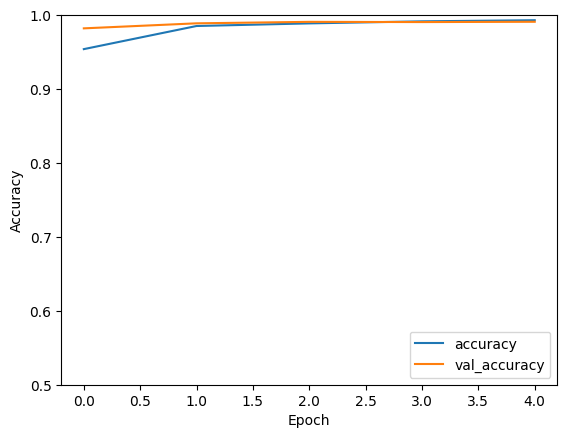

In [ ]:
#Visualize Training Results:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for visualization
history_data = history.history

# Accuracy and Loss Data
accuracy = history_data['accuracy']
val_accuracy = history_data['val_accuracy']
loss = history_data['loss']
val_loss = history_data['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(14, 7))




<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

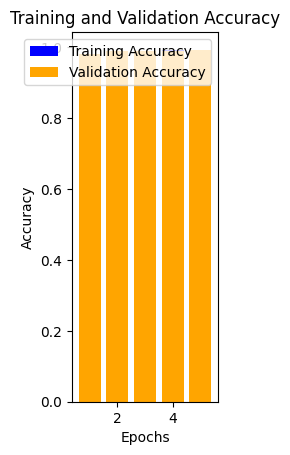

In [ ]:
# Bar Plot
plt.subplot(1, 3, 1)
plt.bar(epochs, accuracy, color='blue', label='Training Accuracy')
plt.bar(epochs, val_accuracy, color='orange', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

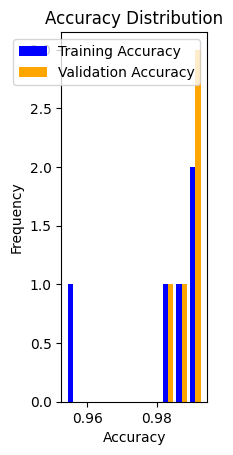

In [ ]:
# Histogram
plt.subplot(1, 3, 2)
plt.hist([accuracy, val_accuracy], bins=10, label=['Training Accuracy', 'Validation Accuracy'], color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Distribution')
plt.legend()
plt.show()

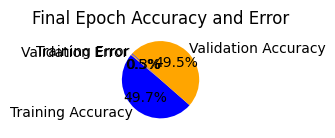

In [ ]:
# Pie Chart (for the last epoch)
plt.subplot(1, 3, 3)
sizes = [accuracy[-1], val_accuracy[-1], 1 - accuracy[-1], 1 - val_accuracy[-1]]
labels = ['Training Accuracy', 'Validation Accuracy', 'Training Error', 'Validation Error']
colors = ['blue', 'orange', 'blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Final Epoch Accuracy and Error')

plt.tight_layout()
plt.show()

In [ ]:
# Plot Loss
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

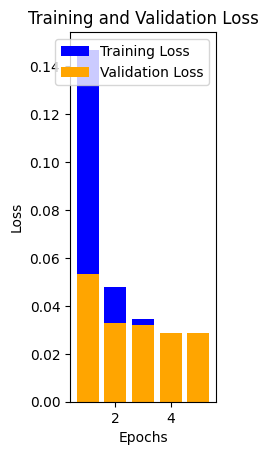

In [ ]:
# Bar Plot
plt.subplot(1, 3, 1)
plt.bar(epochs, loss, color='blue', label='Training Loss')
plt.bar(epochs, val_loss, color='orange', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


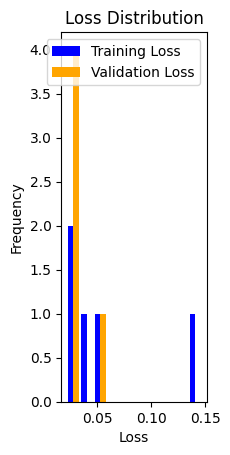

In [ ]:
# Histogram
plt.subplot(1, 3, 2)
plt.hist([loss, val_loss], bins=10, label=['Training Loss', 'Validation Loss'], color=['blue', 'orange'])
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Loss Distribution')
plt.legend()
plt.show()

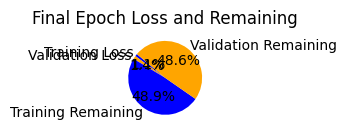

In [ ]:
# Pie Chart (for the last epoch)
plt.subplot(1, 3, 3)
sizes = [loss[-1], val_loss[-1], 1 - loss[-1], 1 - val_loss[-1]]
labels = ['Training Loss', 'Validation Loss', 'Training Remaining', 'Validation Remaining']
colors = ['blue', 'orange', 'blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Final Epoch Loss and Remaining')

plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 7ms/step


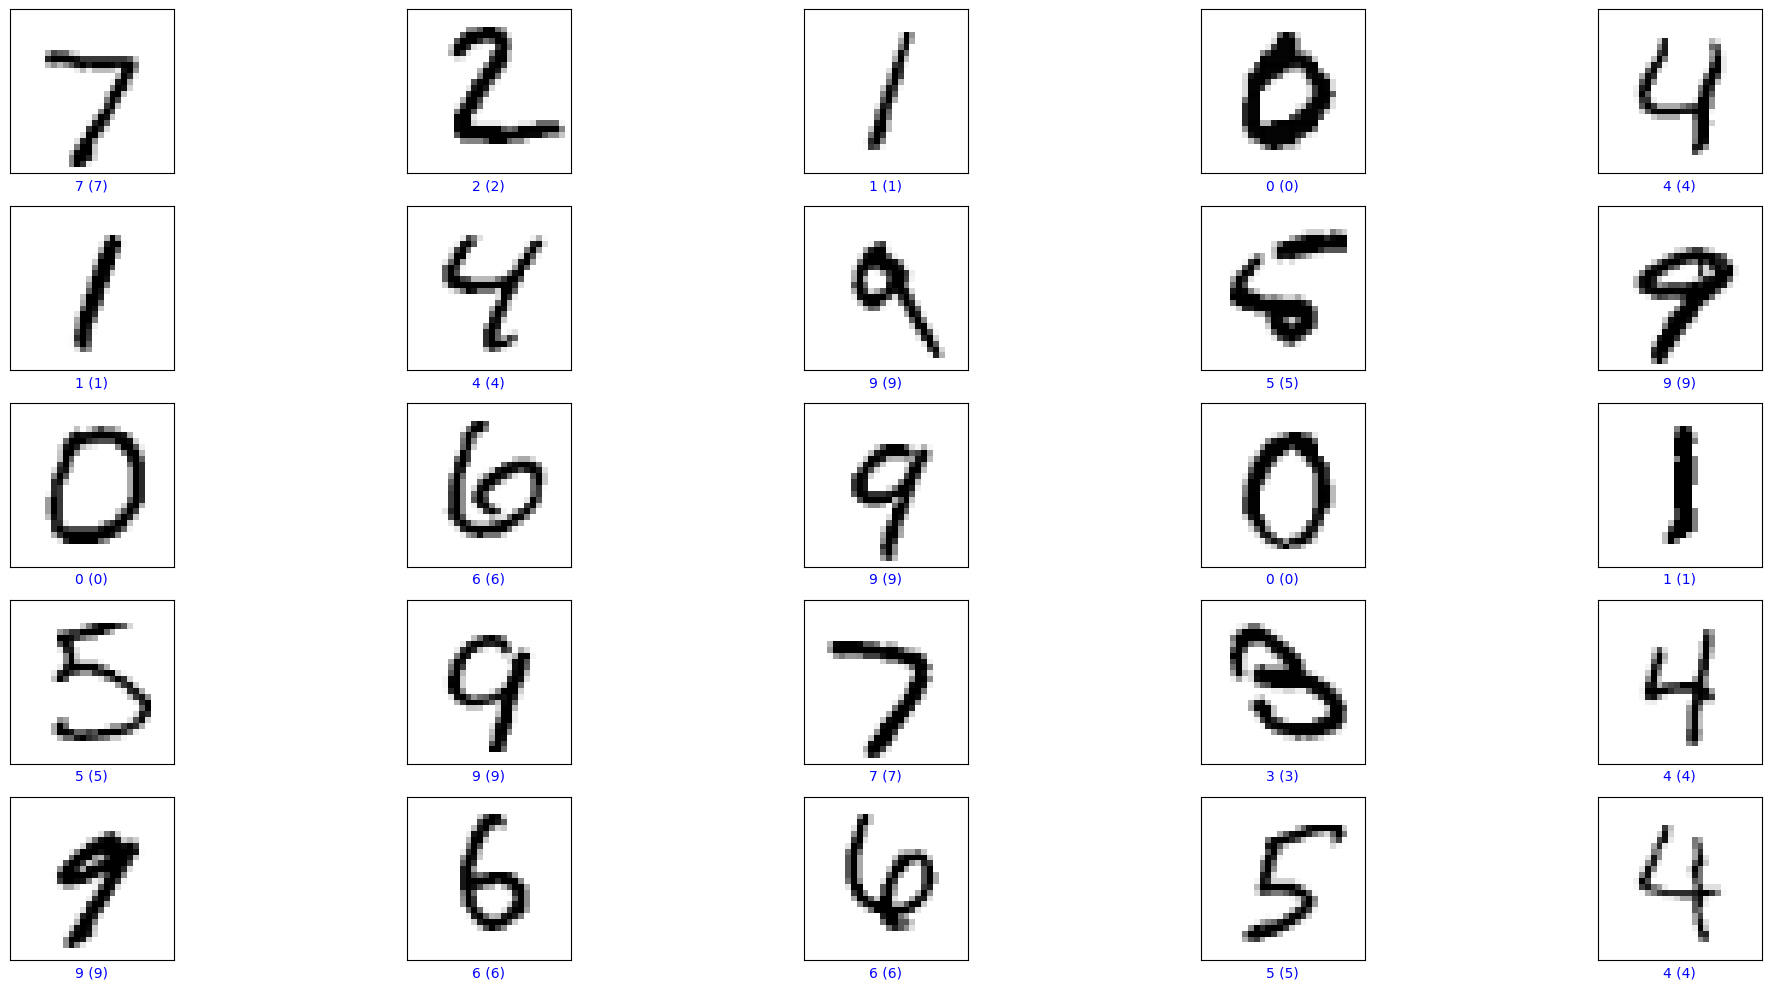

In [ ]:
#Make Predictions:
predictions = model.predict(test_images)

# Function to plot image and prediction
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

# Plot a few test images with their predictions
num_rows, num_cols = 5, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions[i], np.argmax(test_labels[i]), test_images[i])
plt.tight_layout()
plt.show()
